# Day 17 Pre-Class Assignment
---


### <p style="text-align: right;"> &#9989; Put your name here</p>

## Assessing statistical differences with the t-test and the importance of good visualizations

<img src="https://imgs.xkcd.com/comics/t_distribution.png" style="display:block; margin-left: auto; margin-right: auto; width: 70%" alt="The student's t-distribution is replaced by the teacher's t-distribution.">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://xkcd.com/1347/" target="_blank">xkcd.com</a></p>

### Learning goals for today's pre-class assignment

* Be able to articulate what a t-test is and its three main flavors
* Use SciPy to compute a t-test and its associated p-value
* Interpret correctly the meaning of the p-value
* Emphasize the need for good data visualization to guide our statistical conclusions.

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

----

## 1. Introduction to t-tests

In many applications, you'll find yourself taking measurements from different groups and then wondering if these groups are statistically the same or not. You might compare male vs female, control vs treatment, wild type vs mutation, day 1 vs day 20, etc. One of the most common used (and not always fully understood) ways to go about it is by computing a "t-test" (from [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)) and checking its associated p-value.

**Watch the following video on t-tests.** Do not worry much about the formulas used and you can ignore the software tutorial at the end (because Python can also do t-tests).

Early on, the video describes three kinds/types of t-tests. I will call them "flavors".

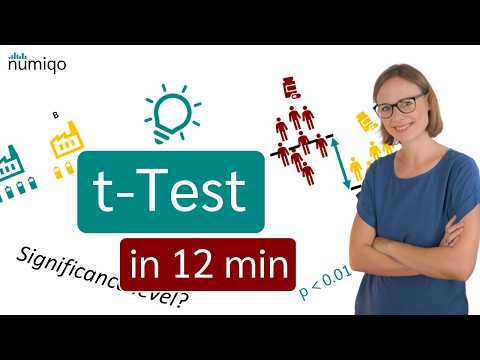

In [2]:
from IPython.display import YouTubeVideo  
YouTubeVideo("a9liXroJyPg",width=640,height=360, end=9*60) 

&#9989;&nbsp; **Question 1** 

- In your own words, explain the three main flavors (kinds/types) of t-tests described in the video.

<font size=+3>&#9998;</font> *Put your three answers here.*


&#9989;&nbsp; **Question 2** 

Say you are hired as a data analyst for [MU's UDAIR](https://udair.missouri.edu/mu-data/student-enrollment/) (University Data, Analytics, and Institutional Research). You have access to all the (anonymized) student enrollment data. 

- For each of the three t-test flavors, describe a question that you could answer with UDAIR's data and a t-test.

<font size=+3>&#9998;</font> *Put your three answers here.*

*
*
*

---

## 2. Going through an example: contaminated pollen

<img src="https://ejamezquita.github.io/tutorials/figs/kettenbach_etal_2017_f4.svg" style="display:block; margin-left: auto; margin-right: auto; width: 60%" alt="Distribution of pollen contamination scores based on location of collection.">
<p style="font-size:0.85em; text-align: center;">Adapted from: <a href="https://doi.org/10.1002/ece3.3272" target="_blank">Kettenbach et al (2017)</a></p>

Let's revisit the data from contaminated pollen we saw in In-Class 15. The data above is adapted from [Kettenbach et al (2017)](https://doi.org/10.1002/ece3.3272), Figure 5. Kettenbach et al. took samples from pollen found on alpine skypilot plants (native) across different locations and altitudes in Colorado. The locations are Hoosier East (HE), Hoosier West (HW), and Weston Pass (WP). The y-axis is the percentage of pollen found that it is actually from willow (invasive).

(This same figure is attached in Canvas if you prefer to switch windows instead of scrolling up and down.)

&#9989;&nbsp; **Question 3** 

Say you are working in the Alpine Skypilot Lab. You want to know if the pollen is more contaminated in certain Colorado regions compared to others. 

- Looking just at the data, which locations have similar contamination levels?
- Which locations have different levels?

Give it your best guess

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **Question 4** 

Visualization is crucial. But so is statistics. It is the combination of both that can reveal the whole story.

- Which of the three t-test flavors is the correct one to use

<font size=+3>&#9998;</font> *Put your answer here.*


### 2.1 Nuances of the p-value

For pre-class 15, you saw an explanation on the true meaning of a p-value. Every t-test comes with an associated p-value, from which **you** make a decision on whether you reject or keep the null hypothesis. 

In this case, the null hypothesis is "there is no statistical difference between the two populations." The p-value indicates the probability that the differences you observe in the data are caused by sheer chance. So a large p-value will prevent you from discarding the null hypothesis. Some important points to consider:

* Not discarding the null hypothesis does **not** mean that the null hypothesis is true. 

* A small p-value does **not** mean that the populations are different. It simply means that there is a very small chance that they are actually the same. It is a nuanced but important distinction.

* p-value is just an indicator of which call *might* be the correct one, but ultimately **YOU** are the one who has to make the call. The best and only way to make that call is by *visualizing the data*. That is why we do scattterplots AND compute correlation p-values. 

&#9989;&nbsp; **Question 4** 

The real p-values for the independent samples t-tests are as follows:

|t-test Comparison | p-value |
|----------:|--------:|
|**HE vs HW**| 0.002 |
|**HE vs WP**| 0.756|
|**HW vs WP**| 2 $\times$ 10<sup>-6</sup> |

Using *both* the table and the scatterplot, answer True or False *and explain your choice.* Go with your best guess.

1. Hoosier East and Weston Pass have similar levels of pollen contamination.
2. Hoosier East and Hoosier West have different levels of contamination.
3. Hoosier West is a 1000 times more different than Weston Pass.

<font size=+3>&#9998;</font> *Put your three answers here.*

*
*
*

---

## 3. Computing independent-sample t-tests with SciPy

Just like with linear regressions,  SciPy's `stats` submodule can compute t-tests for us.

- `stats.ttest_1samp` does a 1-sample t-test.
    - The first flavor: comparing one sample to a fixed mean value.
    - The third flavor: comparing whether the difference between two samples is zero, which is equivalent to compare whether there was a significant change in the same sample.
- `stats.ttest_ind` does a 2-independent samples t-test.
    - The second flavor: comparing whether two arrays are statistically the same

### 3.1 The usual setup

We will use the same data from [Kettenbach et al (2017)](https://doi.org/10.1002/ece3.3272) discussed in Section 2. 

Before doing any stats, as always, we import packages, load the data `2016+population+survey.csv`, and drop NaNs.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
data = pd.read_csv('2016+population+survey.csv').dropna(axis=0, how='any')
print(data.shape)
data.head()

Then we get three Series (1D DataFrame). Each Series contains the pollen contamination percentages found at each of the three sites we are studying. We name these three Series based on the site acronyms we used in Section 2.

&#9989;&nbsp; **Task 5** 

- Comment what each of the lines below is doing

In [ ]:
# Comment each line here
sites = ['Hoosier Pass - East', 'Hoosier Pass - West', 'Weston Pass']
contamination = []
for site in sites:
    pollen_site = data.loc[data['site'] == site, 'frequency of Salix pollen']
    contamination.append(pollen_site)
HE, HW, WP = contamination

&#9989;&nbsp; **Task 6: Your turn** 

- Use `stats.ttest_ind` to compute the t-test and its associated p-value when comparing the pollen contamination differences across the three sites. (That means you need to compute three tests)?
- Do your values match the with those in the table in Section 2?

Read more about the function in [its documentation](https://docs.scipy.org/doc/scipy-1.15.1/reference/generated/scipy.stats.ttest_ind.html).

In [ ]:
# Your code

&#9989;&nbsp; **Question 7** 

Take a look at [Figure 5 from Kettenbach et al (2017)](https://onlinelibrary.wiley.com/cms/asset/cf86d0f7-e9c2-4be2-9b5e-4f95409c0a68/ece33272-fig-0004-m.jpg). It is the same data from Section 2 (with an additional site), except Kettenbach uses boxplots. Ignore the box corresponding to Pennsylvania Mountain.

- What do you think the `a` and `b`s mean on top of the boxplots?

Your best guess is fine. We'll discuss it in class tomorrow.

---

## 4. Boxplots, barplots, and scatterplots

Just one more time, because it cannot be emphasized enough: **good visualization is a crucial step for good data analysis**. The keyword is **good**. Notice that for this assignment you were presented with a scatterplot instead of the boxplots found in the original figure. 

Research shows [over](https://doi.org/10.1111/bph.13925), [over](https://doi.org/10.1038/d41586-024-03996-w), and [over again](https://doi.org/10.1371/journal.pbio.1002128) that boxplots and barplots tend to muddle our understanding of the data and are prone to misinterpretation and abuse. In fact, [some academic journals](https://doi.org/10.1111/bph.13925) are explicitly discouraging paper submissions that do not visually show the actual data points.

**Now watch this short video on how boxplots can distort our understanding of the data. (Barplots are even worse offenders)**

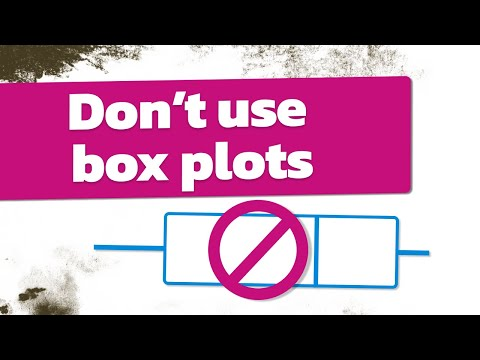

In [3]:
YouTubeVideo("LawTD2KR3Io",width=640,height=360) 

Now compare the following three plots. The are made with the exact same data, but the way the data is displayed is different. We have not fully discussed standard errors: for now think of it as something related to the standard deviation.

<img src="https://ejamezquita.github.io/tutorials/figs/kettenbach_etal_2017_f4_comp.svg" style="display:block; margin-left: auto; margin-right: auto; width: 90%" alt="Distribution of pollen contamination scores based on location of collection.">
<p style="font-size:0.85em; text-align: center;">Adapted from: <a href="https://doi.org/10.1002/ece3.3272" target="_blank">Kettenbach et al (2017)</a></p>

- **A**: your typical barplot. The height of each bar is the mean, with standard error bars.
- **B**: your typical boxplots. The box limits are the 25th and 75th quantiles, with the thick black line in between been the median. The floating points are marked as outliers.
- **C**: scatterplot of the data with some jitter to enhance visualization. The thick line is the median and the dashed lines are the &pm; standard error.

&#9989;&nbsp; **Question 8** 

From the tasks above we know that Hoosier West is different to both Hoosier East and Weston Pass, while Weston Pass and Hoosier East are statistically similar.

- What information is clearer to observe going from A to B?
- What about going from B to C?
- From which plot is easiest to visualize that conclusion? Explain your answer.
- Do you agree with that the points deemed outliers in (B) are truly outliers? Explain your answer.

<font size=+3>&#9998;</font> *Put your answer here.*


---

### Additional reading (optional)

This [blog entry](https://nightingaledvs.com/i-stopped-using-box-plots-the-aftermath/) has a brief but poignant discussion on boxplots versus scatterplots. It has plenty of visual examples (because you can't discuss dataviz without visualizations.)

---

### Assignment wrap-up

Please fill out form from the link below. You must log-in using your MU credentials. **You must completely fill this out in order to receive credit for the assignment!** 

#### https://forms.office.com/r/37zmzq3PT8

In [ ]:
# Click on the link above if this cell fails to produce a survey form.

from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/37zmzq3PT8" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Click the link above if this cell fails to produce a survey
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Canvas web page.  Go to the "Pre-class assignments" folder, find the appropriate submission folder link, and upload it there.

See you in class!

&#169; Copyright 2026,  Division of Plant Science & Technology&mdash;University of Missouri